# Ciência de Dados Aplicada aos Dados Abertos da UFOP

por Rian Lucas Dias Guedes

<img src = "icea.png">

Imagem tirada por Helbert Igor Almeida

## Introdução

Desde que estabelecida em 2011, a Lei 12.527 garante aos cidadãos brasileiros o acesso às informações públicas dos órgãos e instituições governamentais em todas as esferas.  De acordo com a referida legislação, algumas informações  podem  ser  requeridas  por  meio  de  Sistemas de Informações aos Cidadãos enquanto  outras são disponibilizadas a  priori em  serviços  de transparência de  informações. 

Nesse  caso,  um  dos  mecanismos  da  Universidade  Federal  de  Ouro  Preto  para  prover transparência é o Portal UFOP Dados Abertos. Nele foram organizados conjuntos de dados agrupados como: Administração,  Institucional,  Planejamento,  Gestão  de  Pessoas,  Assistência Estudantil,  Graduação,  Extensão,  Pesquisa  e  Pós - Graduação.  Contudo,  indo de  encontro  com  a  própria  natureza  de  dados,  os  dados  disponibilizados nesse Portal estão em estado bruto,  ou seja,  em forma de tabelas as quais a correlação,  a  análise e  visualização  das  informações não é intuitiva.

Nesse sentido,  o objetivo desse projeto é utilizar Ciência de Dados para identificar insights  a  respeito  das  intersecções  entre  os  conjuntos  de  dados  abertos  de assistência  estudantil com  extensão,  pesquisa  e  pós-graduação  da  UFOP.  Logo, a metodologia empregará  como procedimento metodológico o estudo de caso combinado com as técnicas de Ciência de Dados.  Como resultados espera-se revelar a influência das ações de assistência estudantil para o desenvolvimento da extensão e da pesquisa na UFOP pelos discentes beneficiados.

## Sobre o Estudo

O objetivo dessa Iniciação Científica é utilizar a Ciência de Dados para identificar ideias a respeito das intersecções entre os conjuntos de dados disponibilizados no Portal de dados abertos da Universidade Federal de Ouro Preto (UFOP) para entender o comportamento e influência da assistência estudantil ao longo dos anos em relação aos beneficiados.

[Clique no link para acessar o portal](http://dados.ufop.br/)

O Portal de dados abertos apresenta 56 conjuntos de dados disponibilizados em oito categorias:
1. Administração
2. Assistência Estudantil
3. Extensão
4. Pesquisa e Pós-Graduação
5. Graduação
6. Institucional
7. Planejamento
8. Gestão de Pessoas

<div class="alert alert-block alert-info"
     <b> O estudo de caso abordará as categorias Assistência Estudantil, Extensão e Pesquisa e Pós-Graduação </b>
</div>

## Questões Norteadoras a serem respondidas

1. Em quais tipos de projetos (entre os de pesquisa e os de extensão) os discentes beneficiados com programas de assistência estudantil da UFOP têm maior participação?


2. Qual modalidade de participação nos projetos de extensão (bolsista ou voluntário) os discentes beneficiados com programas de assistência estudantil da UFOP têm maior participação?


3. Os discentes beneficiados com programas de assistência estudantil também ingressam nos programas de pós-graduação?

<div class="alert alert-block alert-info"
     <b> De dezoito conjuntos de dados a serem analisados, foram descartados nove conjuntos devido á falta de informações sobre os beneficiados de assistência estudantil na Universidade. </b>
</div>

<img src = "icea1.png">

Imagem tirada por Bruna Lima de Mello

## Teste Piloto

Foi utilizado o conjunto de dados "Bolsistas de Iniciação Científica" para fazer testes de limpeza e visualização de dados para averiguar o funcionamento do Jupyter e na montagem de estratégias que facilitem os próximos passos da Iniciação Científica.

### Importação de Bibliotecas

Algumas bibliotecas fazem parte da Ciência de Dados e é o primeiro passo para qualquer projeto. Logo:


In [4]:
#Importando bibliotecas para o Teste Piloto
import pandas as pd #biblioteca de dataframe 
%matplotlib inline 
import matplotlib.pyplot as plt #Para plotagem e confecção de gráficos
import random #Para criar a funcionalidade de sorteio aleatório
import numpy as np #Para cálculos matriciais 
import csv #para forçar a leitura de arquivos csv

### Arquivo CSV

No Portal de Dados Abertos da UFOP, foi realizado download do conjunto de dados "Bolsista_IC" e foi armazenada em um diretório específico no desktop utilizado. Diante desse cenário:

In [5]:
path = r"D:\UFOP\Horas Complementares\Projetos de Extensão\IC\Dataset\bolsistas_ic.csv" #Endereço do csv para leitura

In [6]:
df = pd.read_csv(path, sep=';', encoding='UTF-8') # Conversão de CSV para o padrão UTF-8


<div class="alert alert-block alert-warning"
     <b> UTF - 8 é o formato padrão para o Brasil em relação ao manuseio de dados. </b>
</div>

### Operações Básicas 

In [7]:
df.dropna(inplace = True) # Descartando colunas com valor nulo para evitar erros


In [8]:
df.info() #Informações sobre as colunas

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3581 entries, 1 to 3790
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   bolsista        3581 non-null   object
 1   curso_bolsista  3581 non-null   object
 2   programa        3581 non-null   object
 3   ano             3581 non-null   int64 
 4   orientador      3581 non-null   object
 5   setor           3581 non-null   object
 6   linha_pesquisa  3581 non-null   object
 7   id_projeto      3581 non-null   int64 
 8   título          3581 non-null   object
 9   fomento         3581 non-null   object
 10  tipo_bolsa      3581 non-null   object
dtypes: int64(2), object(9)
memory usage: 335.7+ KB


<div class="alert alert-block alert-success"
     <b> Com a função info(), é possível saber número de linhas, número de colunas, tamanho de bytes e os tipos de dados envolvidos. Certamente, é uma ótima função para análises mais profundas e fornece um start inicial em qualquer projeto em relação ao conhecimento de uma dataframe. </b>
</div>


In [9]:
df.shape #Tamanho da base de dados: número de linhas e número de colunas

(3581, 11)

In [10]:
df.columns #Saber o nome das colunas

Index(['bolsista', 'curso_bolsista', 'programa', 'ano', 'orientador', 'setor',
       'linha_pesquisa', 'id_projeto', 'título', 'fomento', 'tipo_bolsa'],
      dtype='object')

In [11]:
df['ano'].min() #menor data da coluna ano

2017

In [12]:
df['ano'].max() #maior data da coluna ano


2021

### Limpeza de Dados

O processo de limpeza de dados é crucial em projetos de Ciência e Análise de Dados, sendo um processo notório e importante para qualquer contexto. Logo, podemos analisar algumas medidas, entre elas:

In [13]:
df['tipo_bolsa'].replace("VOLUNTARIO", "VOLUNTÁRIO", inplace=True) # alterando valores da coluna tipo_bolsa

In [14]:
df.drop(['programa', 'linha_pesquisa', 'id_projeto', 'título'], axis=1, inplace=True) #removendo colunas que não serão usadas

In [15]:
df.columns = ['Bolsista','Curso','Ano','Orientador','Departamento','Fomento','Tipo de Aluno'] #Renomeando colunas

In [16]:
df['Tipo de Aluno'].value_counts(normalize=True) * 100 #porcentagem de alunos por tipo de bolsa

BOLSISTA      61.547054
VOLUNTÁRIO    38.452946
Name: Tipo de Aluno, dtype: float64

In [17]:
#Inserindo coluna para contagem para facilitar nas análises
df['Contagem'] = 1

In [18]:
df.drop(['Orientador'], axis=1, inplace=True) #Excluindo o campo Orientador

In [19]:
def categorizar_departamento(Departamento): #Função para categorizar os departamentos em Unidades
    if Departamento == "DEEGEP"or Departamento =="DEETE":
        return 'CEAD'
    elif Departamento == "DEENP" or Departamento =="DEELT" or Departamento =="DECSI" or Departamento =="DECEA":
        return 'ICEA'
    elif Departamento == "DECAD" or Departamento =="DECSO" or Departamento =="DEECO" or Departamento =="DEJOR" or Departamento =="DESSO":
        return 'ICSA'
    elif Departamento == "DEART" or Departamento =="DEFIL" or Departamento =="DEHIS" or Departamento =="DELET":
        return 'ICHS'
    elif Departamento == "DEDIR" or Departamento =="DEMUL" or Departamento =="DETUR":
        return 'EDTM'
    elif Departamento == "DEEFD":
        return 'EEF'
    elif Departamento == "DEACL" or Departamento =="DEFAR":
        return 'EFAR'
    elif Departamento == "DEAMB" or Departamento =="DEARQ" or Departamento =="DECAT" or Departamento =="DEMEC" or Departamento =="DECIV" or Departamento =="DEGEO" or Departamento =="DEMET" or Departamento =="DEMIN" or Departamento =="DEPRO" or Departamento =="DEURB":
        return 'EMINAS'
    elif Departamento == "DECPG" or Departamento =="DECPA" or Departamento =="DEMSC":
        return 'EMED'
    elif Departamento == "DEALI" or Departamento =="DENCS":
        return 'ENUT'
    elif Departamento == "DECOM" or Departamento =="DEFIS" or Departamento =="DEQUI" or Departamento =="DECBI" or Departamento =="DEBIO" or Departamento =="DEEMA" or Departamento =="DEEST" or Departamento =="DEMAT":
        return 'ICEB'
    else:
        return 'IFAC'

In [20]:
df['Unidade'] = df['Departamento'].apply(categorizar_departamento) #aplicação da função acima

In [21]:
df #Imprimindo a database com base nas alterações acima

,Bolsista,Curso,Ano,Departamento,Fomento,Tipo de Aluno,Contagem,Unidade
1,ALINE TONHELA FERRAZ,FARMACIA,2017,DECBI,FAPEMIG,BOLSISTA,1,IFAC
2,AMANDA ALVES CAMPOS,ADMINISTRACAO,2017,DECEG,UFOP,VOLUNTÁRIO,1,IFAC
3,ANA CARMEM GOMES MENEZES,CIENCIAS ECONOMICAS,2017,DECEG,UFOP,VOLUNTÁRIO,1,IFAC
4,ANA CAROLINA DA SILVA,TURISMO,2017,DETUR,UFOP,VOLUNTÁRIO,1,IFAC
5,ANA CAROLINA DE OLIVEIRA DO CARMO,CIENCIA DA COMPUTACAO,2017,DECOM,UFOP,VOLUNTÁRIO,1,IFAC
...,...,...,...,...,...,...,...,...
3786,FABIO ROQUE RIBEIRO,ENGENHARIA DE PRODUCAO,2021,DEEDU,CNPQ,BOLSISTA,1,IFAC
3787,PEDRO GABAN PETINDA MOREIRA,ARTES CENICAS,2021,DEEDU,UFOP,BOLSISTA,1,IFAC
3788,REBECA DE SILVA OLIVEIRA,PEDAGOGIA,2021,DEEDU,UFOP,BOLSISTA,1,IFAC
3789,FERNANDA LIMA ALVARES DA SILVA,LETRAS,2021,DELET,UFOP,BOLSISTA,1,ICHS


### Visualização de Dados

A visualização de dados é outro processo crucial em Ciência de Dados e Análise de Dados em qualquer contexto, o objetivo desse processo é detalhar, mostrar, apresentar e organizar as informações que podem ser contidas ao analisar dados expostos de maneira fácil e interativa ao usuário.

In [22]:
#Cores para serem usadas nos gráficos
colors = [['#AFB0D4','#8589FB','#CFD1FA','#41437A','#A5A6C7'],
          ['#E2C5FD','#BC78FB','#DFC3FA','#5C3B7A','#B29BC7'],
          ['#AAFAC6','#5FFB96','#AAFAC6','#2F7A49','#87C79E']
         ]

### Questões Norteadoras

1. Quantos alunos são bolsistas e quantos alunos são voluntários nos projetos de Iniciação Científica?

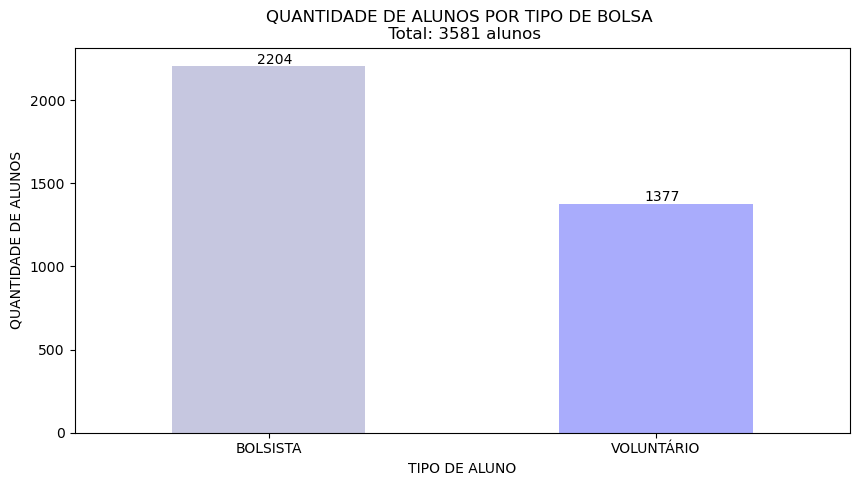

In [23]:
grafico_df = df.groupby('Tipo de Aluno')['Contagem'].sum().plot(kind='bar', figsize=(10,5), color=random.choice(colors), alpha=.7)

for p in grafico_df.patches:
    b=p.get_bbox()
    grafico_df.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.03, b.y1 + 15))

plt.xticks(rotation=0)
plt.xlabel('TIPO DE ALUNO')
plt.ylabel('QUANTIDADE DE ALUNOS')
plt.title('QUANTIDADE DE ALUNOS POR TIPO DE BOLSA \n Total: ' + str(df['Contagem'].sum()) + ' alunos')
plt.show()

2. Quantos alunos por ano fazem Iniciação Científica na UFOP?

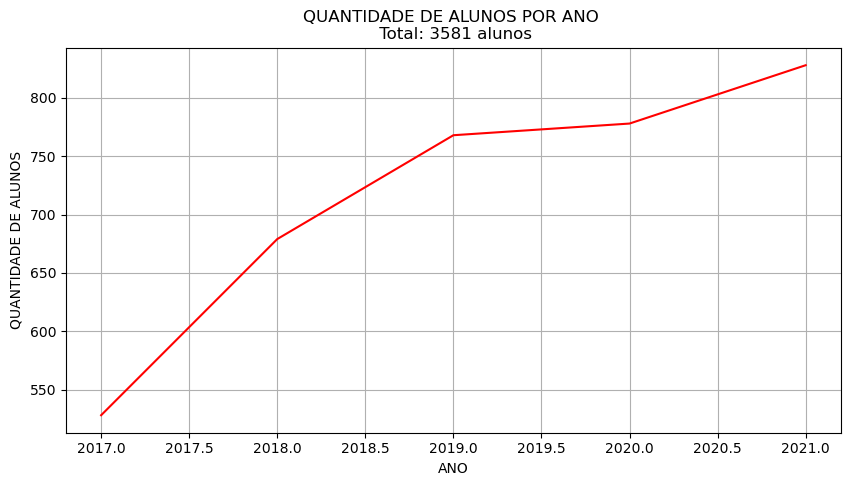

In [24]:
plotagem = df.copy()
plotagem.groupby('Ano')['Contagem'].sum().plot(color='red', figsize=(10,5), grid=True)

plt.title('QUANTIDADE DE ALUNOS POR ANO \n Total: ' + str(df['Contagem'].sum()) + ' alunos')
plt.xlabel('ANO')
plt.ylabel('QUANTIDADE DE ALUNOS')
plt.show()

<div class="alert alert-block alert-info"
     <b> Observação: o conjunto de dados apresenta a quantidade de cursos que o aluno se matriculou e registra se ele trancou algum período e retornou depois. Logo, foi realizado um filtro para eliminar esses casos especiais. </b>
</div>


<div class="alert alert-block alert-info"
     <b> Observação: os anos estão dividos em semestres, utilizando os números decimais 0 e 5 para diferenciar o semestre de cada ano. </b>
</div>

## Segundo Teste Piloto


Além do conjunto de dados "Bolsistas de Iniciação Científica", foi utilizada para tratamento de dados, limpeza e visualização a base de dados "Bolsa Renumerada".

No Portal de Dados Abertos da UFOP, existem várias planilhas e arquivos PDF organizados por ano. Diante dessa situação, foram unificados todas as planilhas e convertemos PDF para CSV para utilizarmos uma única planilha.

O campo "Razão Social" foi desconsiderado da planilha devido ao fato de ter nenhum registro nos conjuntos de dados escolhidos. As bases são de 2010 á 2022.

### Importando o Conjunto de Dados

In [25]:
path_um = r"D:\UFOP\Horas Complementares\Projetos de Extensão\IC\Dataset\bolsa_renumerada.csv" #Endereço do csv para leitura

In [26]:
df_um = pd.read_csv(path_um, sep=';', encoding='UTF-8') # Conversão de CSV para o padrão UTF-8

### Operações Básicas

In [27]:
df_um.dropna(inplace = True) # Descartando colunas com valor nulo para evitar erros

In [28]:
df_um.info() #Informações sobre as colunas

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34719 entries, 0 to 35172
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   nome             34719 non-null  object 
 1   Código curso     34719 non-null  object 
 2   descricao/bolsa  34719 non-null  object 
 3   data_inicio      34719 non-null  int64  
 4   data_fim         34719 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 1.6+ MB


In [29]:
df_um.shape #Tamanho da base de dados: número de linhas e número de colunas

(34719, 5)

In [30]:
df_um.columns #Saber o nome das colunas

Index(['nome', 'Código curso', 'descricao/bolsa', 'data_inicio', 'data_fim'], dtype='object')

In [31]:
df_um['data_inicio'].min() #menor data de inicio do dataframe

212

In [32]:
df_um['data_inicio'].max() #maior data de inicio do dataframe

2022

In [33]:
df_um['data_fim'].min() #menor data fim do dataframe

2009.0

In [34]:
df_um['data_fim'].max() #maior data fim do dataframe

2025.0

### Limpeza de Dados

In [35]:
#Inserindo coluna para contagem para facilitar nas análises
df_um['Contagem'] = 1

In [36]:
df_um.columns = ['Bolsista','Curso','Categoria da Bolsa','Data de Inicio','Data Fim','Contagem'] #Renomeando colunas

In [37]:
df_um

,Bolsista,Curso,Categoria da Bolsa,Data de Inicio,Data Fim,Contagem
0,THALYCK DOUGLAS DIAS ESTEVES,ENGENHARIA DE PRODUCAO ...,AUXILIO MORADIA - JM,2013,2015.0,1
1,THALES ROSSE PINTO COELHO,ENGENHARIA ELETRICA ...,AUXILIO MORADIA - JM,2013,2013.0,1
2,DANIEL FERREIRA PINTO,SISTEMAS DE INFORMACAO ...,AUXILIO MORADIA - JM,2013,2016.0,1
3,LUCAS SOARES DA CRUZ,ENGENHARIA DE COMPUTACAO ...,AUXILIO MORADIA - JM,2013,2015.0,1
4,MATEUS OLIVEIRA DOS SANTOS,ENGENHARIA DE COMPUTACAO ...,AUXILIO MORADIA - JM,2013,2015.0,1
...,...,...,...,...,...,...
35168,CAROLINA PAMELA DA COSTA,MEDICINA,BOLSA PERMANENCIA,2016,2019.0,1
35169,GIULIA DE ASSIS BOCOLI,FARMACIA,BOLSA PERMANENCIA,2016,2019.0,1
35170,JOSE MOTA NETO,ENGENHARIA AMBIENTAL,BOLSA PERMANENCIA,2016,2019.0,1
35171,LUAN RICARDO PEREIRA DE SOUZA,ENGENHARIA DE MINAS,BOLSA PERMANENCIA,2016,2019.0,1


### Alterando Valores das Categorias de Bolsa

In [38]:
df_um['Categoria da Bolsa'].replace("AUXILIO MORADIA - JM", "MORADIA", inplace=True) # alterando valores da coluna

In [39]:
df_um['Categoria da Bolsa'].replace("AUXILIO MORADIA MEDIDA PROTETIVA", "MORADIA", inplace=True) # alterando valores da coluna

In [40]:
df_um['Categoria da Bolsa'].replace("BIDA-INCENTIVO DESENV. ACADEMICO", "BIDA", inplace=True) #alterando valores da coluna

In [41]:
df_um['Categoria da Bolsa'].replace("BOLSA AUXILIO MORADIA - REFORMA MA", "MORADIA", inplace=True) #alterando valores da coluna

In [42]:
df_um['Categoria da Bolsa'].replace("BOLSA COMPLEMENTO RU", "RU", inplace=True) #alterando valores da coluna

In [43]:
df_um['Categoria da Bolsa'].replace("BOLSA INTEGRAL RU", "RU", inplace=True) #alterando valores da coluna

In [44]:
df_um['Categoria da Bolsa'].replace("BOLSA PARCIAL RU", "RU", inplace=True) #alterando valores da coluna

In [45]:
df_um['Categoria da Bolsa'].replace("BOLSA PARCIAL RU COM TICKET", "RU", inplace=True) #alterando valores da coluna

In [46]:
df_um['Categoria da Bolsa'].replace("BOLSA PERMANENCIA", "PERMANENCIA", inplace=True) #alterando valores da coluna

In [47]:
df_um['Categoria da Bolsa'].replace("BOLSA PERMANENCIA MEC", "PERMANENCIA", inplace=True) #alterando valores da coluna

In [48]:
df_um['Categoria da Bolsa'].replace("BOLSA PERMANENCIA QUILOMBOLA", "PERMANENCIA", inplace=True) #alterando valores da coluna

In [49]:
df_um['Categoria da Bolsa'].replace("BOLSA PIDIC PRACE", "PIDIC", inplace=True) #alterando valores da coluna

In [50]:
df_um['Categoria da Bolsa'].replace("DESENVOLVIMENTO - PRACE/NEI", "DESENVOLVIMENTO", inplace=True) #alterando valores da coluna

In [51]:
df_um['Categoria da Bolsa'].replace("DESENVOLVIMENTO - PRACE/PRACE", "DESENVOLVIMENTO", inplace=True) #alterando valores da coluna

In [52]:
df_um['Categoria da Bolsa'].replace("DESENVOLVIMENTO - PRACE/PRACE - 15HS", "DESENVOLVIMENTO", inplace=True) #alterando valores da coluna

In [53]:
df_um['Categoria da Bolsa'].replace("DESENVOLVIMENTO - PRACE/PRACE - 20HS", "DESENVOLVIMENTO", inplace=True) #alterando valores da coluna

In [54]:
df_um['Categoria da Bolsa'].replace("EXTENSÃƒO PRACE 2018", "EXTENSÃO", inplace=True) #alterando valores da coluna

In [55]:
df_um['Categoria da Bolsa'].replace("EXTENSÃO PRACE 2018", "EXTENSÃO", inplace=True) #alterando valores da coluna

In [56]:
df_um['Categoria da Bolsa'].replace("INCLUS?O DIGITAL AQUISI??O", "INCLUSÃO DIGITAL", inplace=True) #alterando valores da coluna

In [57]:
df_um['Categoria da Bolsa'].replace("INCLUS?O DIGITAL AQUISI??O PCD", "INCLUSÃO DIGITAL", inplace=True) #alterando valores da coluna

In [58]:
df_um['Categoria da Bolsa'].replace("INCLUS?O DIGITAL MANUTEN??O", "INCLUSÃO DIGITAL", inplace=True) #alterando valores da coluna

In [59]:
df_um['Categoria da Bolsa'].replace("INCLUS?O DIGITAL MANUTEN??O PCD", "INCLUSÃO DIGITAL", inplace=True) #alterando valores da coluna

In [60]:
df_um['Categoria da Bolsa'].replace("INCLUS?O DIGITAL PRACE BOLSISTAS AC", "INCLUSÃO DIGITAL", inplace=True) #alterando valores da coluna

In [61]:
df_um['Categoria da Bolsa'].replace("INCLUS?O DIGITAL PRACE N?O BOLSISTAS AC", "INCLUSÃO DIGITAL", inplace=True) #alterando valores da coluna

In [62]:
df_um['Categoria da Bolsa'].replace("INCLUSÃO DIGITAL PRACE BOLSISTAS AC", "INCLUSÃO DIGITAL", inplace=True) #alterando valores da coluna

In [63]:
df_um['Categoria da Bolsa'].replace("INCLUSÃO DIGITAL PRACE NÃO BOLSISTA AC", "INCLUSÃO DIGITAL", inplace=True) #alterando valores da coluna

In [64]:
df_um['Categoria da Bolsa'].replace("MONITORIA INCLUSIVA - NEI", "NEI", inplace=True) #alterando valores da coluna

In [65]:
df_um['Categoria da Bolsa'].replace("PRODESA - DESENV. SOCIAL E ACADEMICO", "PRODESA", inplace=True) #alterando valores da coluna

### Alterando Valores dos Cursos

In [66]:
df_um['Curso'].replace("SJM", "SISTEMAS DE INFORMACAO", inplace=True) #alterando valores da coluna

In [67]:
df_um['Curso'].replace("ADM", "ADMINISTRACAO", inplace=True) #alterando valores da coluna

In [68]:
df_um['Curso'].replace("MED", "MEDICINA", inplace=True) #alterando valores da coluna

In [69]:
df_um['Curso'].replace("NUT", "NUTRICAO", inplace=True) #alterando valores da coluna

In [70]:
df_um['Curso'].replace("PED", "PEDAGOGIA", inplace=True) #alterando valores da coluna

In [71]:
df_um['Curso'].replace("TUR", "TURISMO", inplace=True) #alterando valores da coluna

In [72]:
df_um['Curso'].replace("ADM", "ADMINISTRACAO", inplace=True) #alterando valores da coluna

In [73]:
df_um['Curso'].replace("ARQ", "ARQUITETURA", inplace=True) #alterando valores da coluna

In [74]:
df_um['Curso'].replace("ADM", "ADMINISTRACAO", inplace=True) #alterando valores da coluna

In [75]:
df_um['Curso'].replace("ACB", "ARTES CENICAS", inplace=True) #alterando valores da coluna

In [76]:
df_um['Curso'].replace("ACL", "ARTES CENICAS", inplace=True) #alterando valores da coluna

In [77]:
df_um['Curso'].replace("COM", "CIENCIA DA COMPUTACAO", inplace=True) #alterando valores da coluna

In [78]:
df_um['Curso'].replace("ALI", "CIENCIA E TECNOLOGIA DE ALIMENTOS", inplace=True) #alterando valores da coluna

In [79]:
df_um['Curso'].replace("CBB", "CIENCIAS BIOLOGICAS", inplace=True) #alterando valores da coluna

In [80]:
df_um['Curso'].replace("CBL", "CIENCIAS BIOLOGICAS", inplace=True) #alterando valores da coluna

In [81]:
df_um['Curso'].replace("DIR", "DIREITO", inplace=True) #alterando valores da coluna

In [82]:
df_um['Curso'].replace("D04", "DIREITO", inplace=True) #alterando valores da coluna

In [83]:
df_um['Curso'].replace("QLI", "QUIMICA", inplace=True) #alterando valores da coluna

In [84]:
df_um['Curso'].replace("QUI", "QUIMICA INDUSTRIAL", inplace=True) #alterando valores da coluna

In [85]:
df_um['Curso'].replace("SER", "SERVICO SOCIAL", inplace=True) #alterando valores da coluna

In [86]:
df_um['Curso'].replace("ECO", "CIENCIAS ECONOMICAS", inplace=True) #alterando valores da coluna

In [87]:
df_um['Curso'].replace("EJM", "ENGENHARIA ELETRICA", inplace=True) #alterando valores da coluna

In [88]:
df_um['Curso'].replace("PJM", "ENGENHARIA DE PRODUCAO", inplace=True) #alterando valores da coluna

In [89]:
df_um['Curso'].replace("CJM", "ENGENHARIA DA COMPUTACAO", inplace=True) #alterando valores da coluna

In [90]:
df_um['Curso'].replace("GEO", "ENGENHARIA GEOLOGICA", inplace=True) #alterando valores da coluna

In [91]:
df_um['Curso'].replace("EST", "ESTATISTICA", inplace=True) #alterando valores da coluna

In [92]:
df_um['Curso'].replace("FAR", "FARMACIA", inplace=True) #alterando valores da coluna

In [93]:
df_um['Curso'].replace("PRO", "ENGENHARIA DE PRODUCAO", inplace=True) #alterando valores da coluna

In [94]:
df_um['Curso'].replace("JOR", "JORNALISMO", inplace=True) #alterando valores da coluna

In [95]:
df_um['Curso'].replace("URB", "ENGENHARIA URBANA", inplace=True) #alterando valores da coluna

In [96]:
df_um['Curso'].replace("HIB", "HISTORIA", inplace=True) #alterando valores da coluna

In [97]:
df_um['Curso'].replace("HIL", "HISTORIA", inplace=True) #alterando valores da coluna

In [98]:
df_um['Curso'].replace("MEC", "ENGENHARIA MECANICA", inplace=True) #alterando valores da coluna

In [99]:
df_um['Curso'].replace("MET", "ENGENHARIA METALURGICA", inplace=True) #alterando valores da coluna

In [100]:
df_um['Curso'].replace("MIN", "ENGENHARIA DE MINAS", inplace=True) #alterando valores da coluna

In [101]:
df_um['Curso'].replace("AMB", "ENGENHARIA AMBIENTAL", inplace=True) #alterando valores da coluna

In [102]:
df_um['Curso'].replace("AUT", "ENGENHARIA DE CONTROLE E AUTOMOCAO", inplace=True) #alterando valores da coluna

In [103]:
df_um['Curso'].replace("CIV", "ENGENHARIA CIVIL", inplace=True) #alterando valores da coluna

In [104]:
df_um['Curso'].replace("EFB", "EDUCACAO FISICA", inplace=True) #alterando valores da coluna

In [105]:
df_um['Curso'].replace("EFL", "EDUCACAO FISICA", inplace=True) #alterando valores da coluna

In [106]:
df_um['Curso'].replace("FLB", "FILOSOFIA", inplace=True) #alterando valores da coluna

In [107]:
df_um['Curso'].replace("FLL", "FILOSOFIA", inplace=True) #alterando valores da coluna

In [108]:
df_um['Curso'].replace("FSB", "FISICA", inplace=True) #alterando valores da coluna

In [109]:
df_um['Curso'].replace("FSL", "FISICA", inplace=True) #alterando valores da coluna

In [110]:
df_um['Curso'].replace("LTB", "LETRAS", inplace=True) #alterando valores da coluna

In [111]:
df_um['Curso'].replace("LTL", "LETRAS", inplace=True) #alterando valores da coluna

In [112]:
df_um['Curso'].replace("LTE", "LETRAS", inplace=True) #alterando valores da coluna

In [113]:
df_um['Curso'].replace("LTP", "LETRAS", inplace=True) #alterando valores da coluna

In [114]:
df_um['Curso'].replace("LTT", "LETRAS", inplace=True) #alterando valores da coluna

In [115]:
df_um['Curso'].replace("LTI", "LETRAS", inplace=True) #alterando valores da coluna

In [116]:
df_um['Curso'].replace("MTL", "MATEMATICA", inplace=True) #alterando valores da coluna

In [117]:
df_um['Curso'].replace("MTB", "MATEMATICA", inplace=True) #alterando valores da coluna

In [118]:
df_um['Curso'].replace("MUL", "MUSEOLOGIA", inplace=True) #alterando valores da coluna

In [119]:
df_um['Curso'].replace("MUS", "MUSICA", inplace=True) #alterando valores da coluna

### Alterando Valores dos Anos

In [120]:
df_um['Data de Inicio'].replace("212", "2012", inplace=True) #alterando valores da coluna

In [121]:
df_um

,Bolsista,Curso,Categoria da Bolsa,Data de Inicio,Data Fim,Contagem
0,THALYCK DOUGLAS DIAS ESTEVES,ENGENHARIA DE PRODUCAO ...,MORADIA,2013,2015.0,1
1,THALES ROSSE PINTO COELHO,ENGENHARIA ELETRICA ...,MORADIA,2013,2013.0,1
2,DANIEL FERREIRA PINTO,SISTEMAS DE INFORMACAO ...,MORADIA,2013,2016.0,1
3,LUCAS SOARES DA CRUZ,ENGENHARIA DE COMPUTACAO ...,MORADIA,2013,2015.0,1
4,MATEUS OLIVEIRA DOS SANTOS,ENGENHARIA DE COMPUTACAO ...,MORADIA,2013,2015.0,1
...,...,...,...,...,...,...
35168,CAROLINA PAMELA DA COSTA,MEDICINA,PERMANENCIA,2016,2019.0,1
35169,GIULIA DE ASSIS BOCOLI,FARMACIA,PERMANENCIA,2016,2019.0,1
35170,JOSE MOTA NETO,ENGENHARIA AMBIENTAL,PERMANENCIA,2016,2019.0,1
35171,LUAN RICARDO PEREIRA DE SOUZA,ENGENHARIA DE MINAS,PERMANENCIA,2016,2019.0,1


### Visualização de Dados

### Questões Norteadoras

1. Qual a quantidade de alunos por categoria de bolsa?

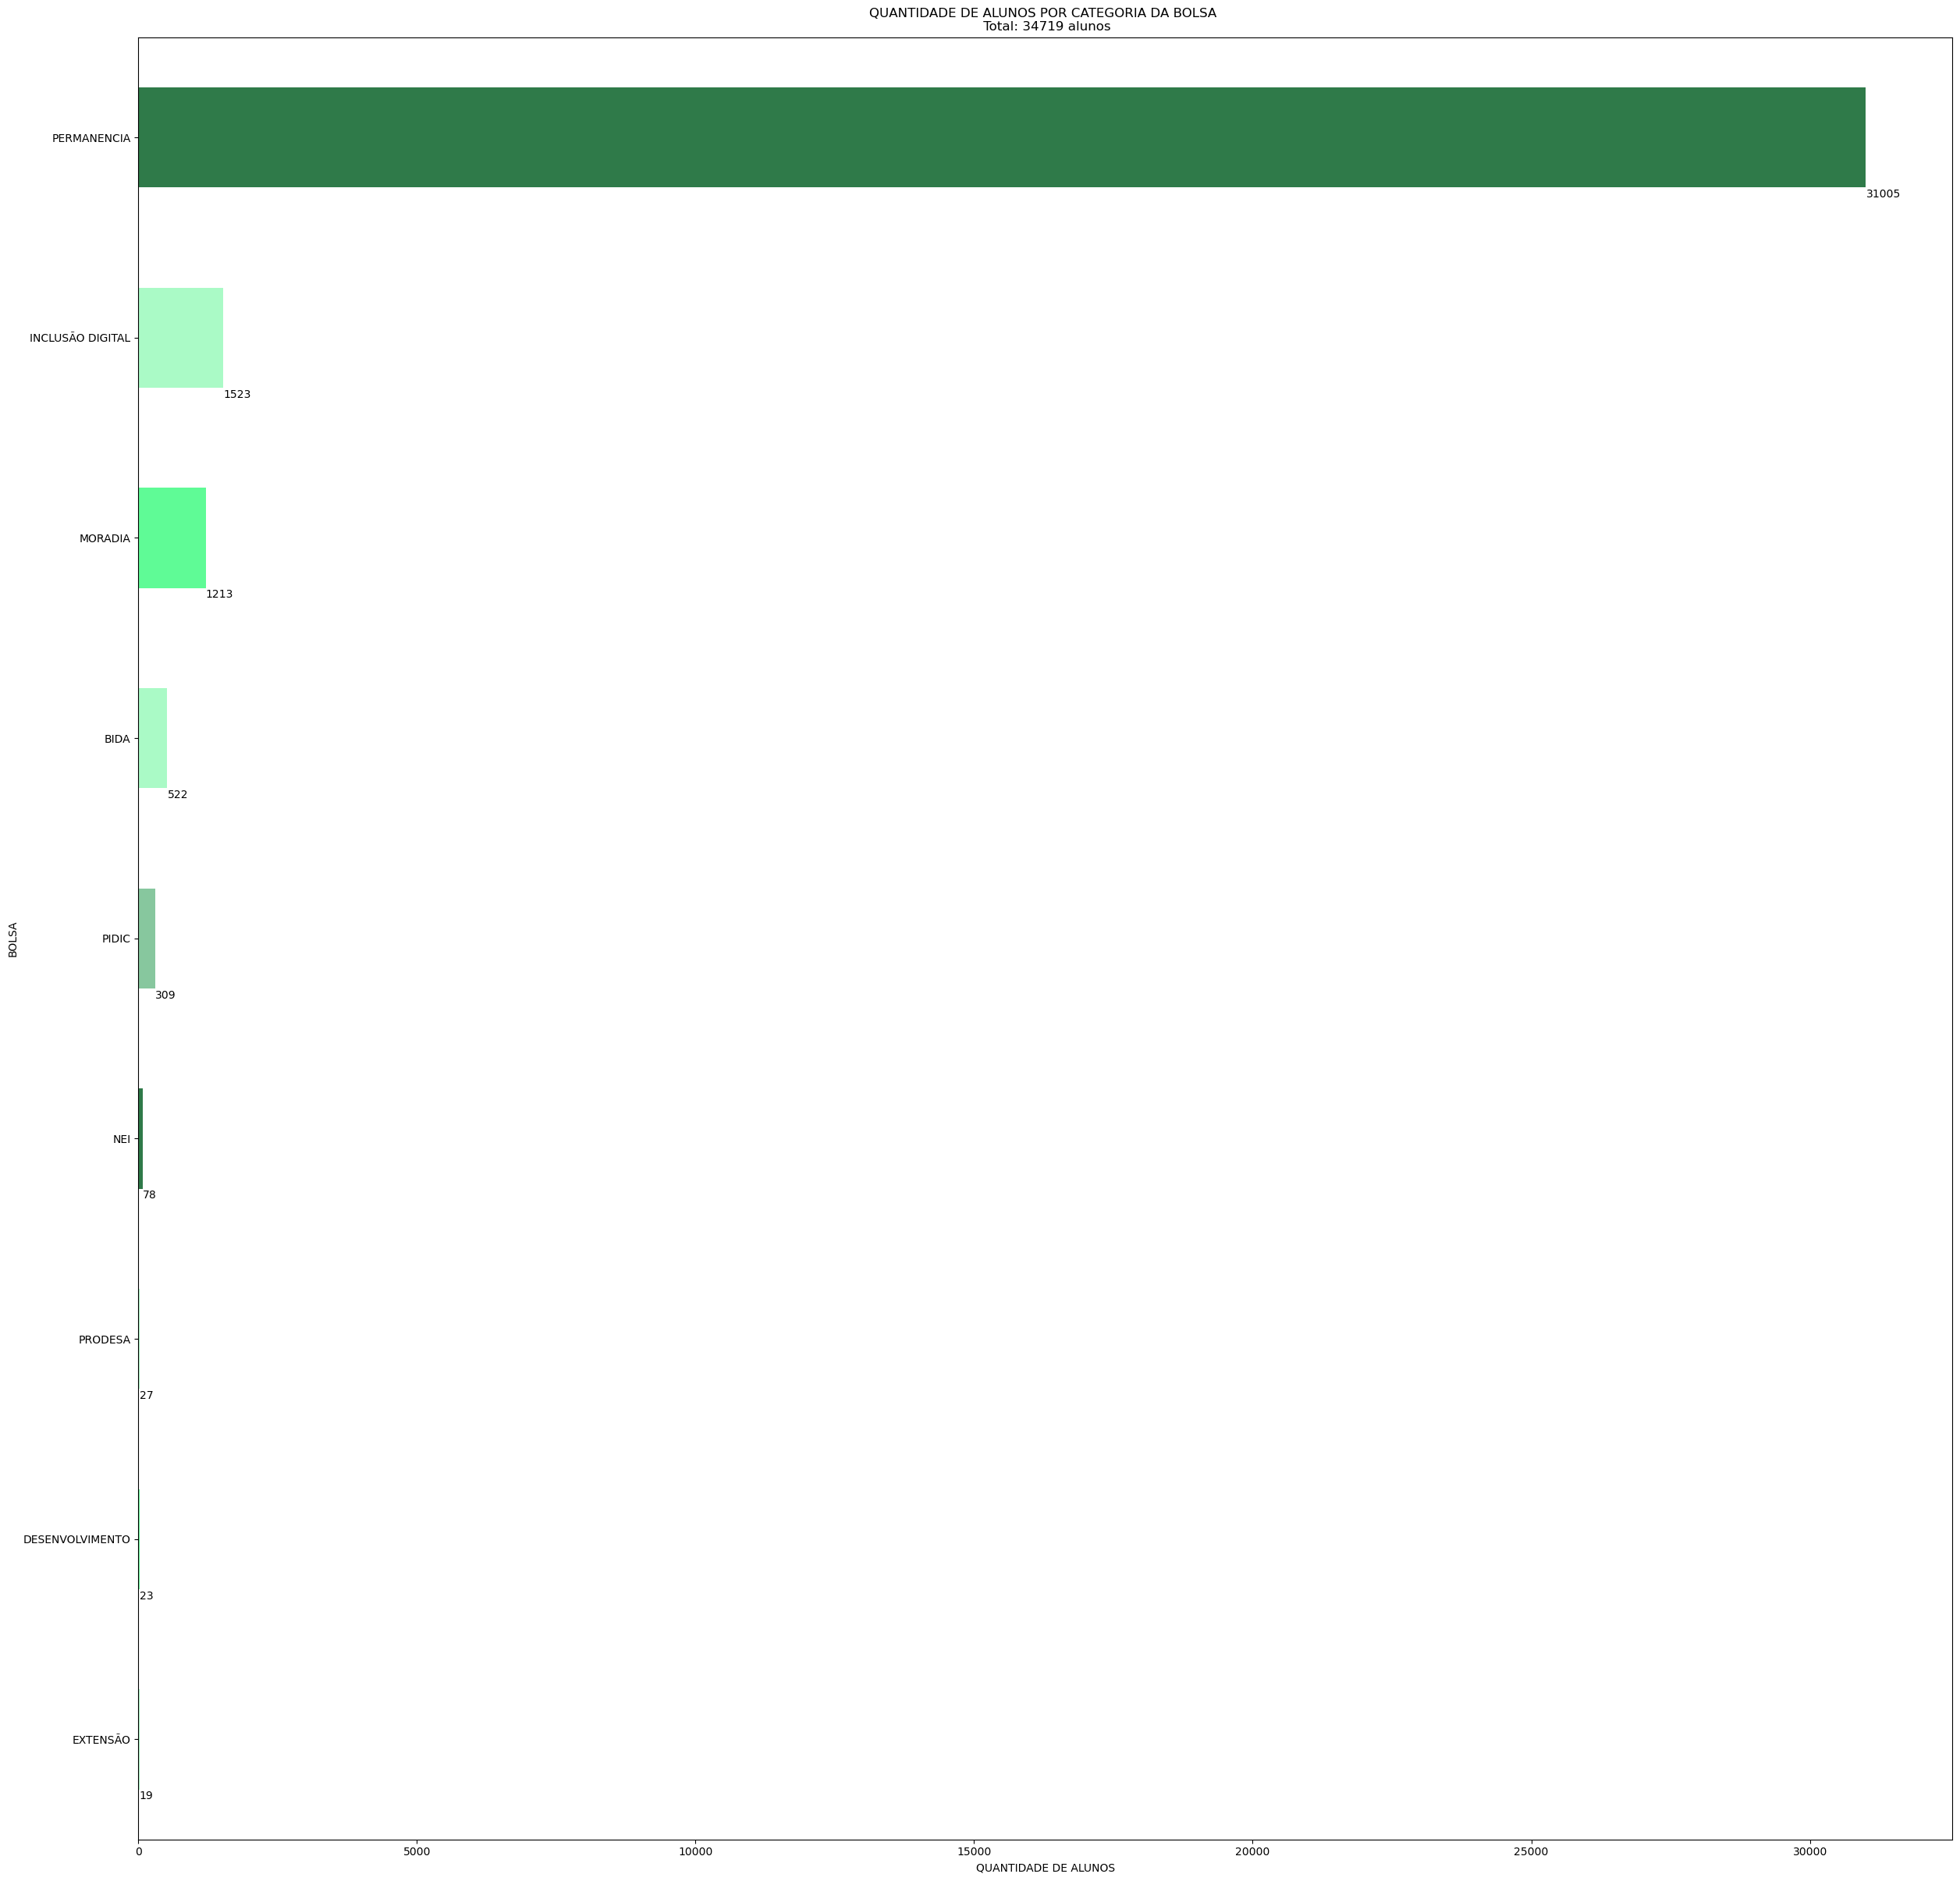

In [122]:
histograma_um = df_um.groupby('Categoria da Bolsa')['Contagem'].sum().sort_values().plot(kind='barh', color=random.choice(colors), figsize=(30,30))

for p in histograma_um.patches:
    b=p.get_bbox()
    histograma_um.annotate("{:.0f}".format(b.x1 + b.x0), (p.get_x() + p.get_width() + 1, p.get_y() - 0.05))

plt.title('QUANTIDADE DE ALUNOS POR CATEGORIA DA BOLSA \n Total: ' + str(df_um['Contagem'].sum()) + ' alunos')
plt.ylabel('BOLSA')
plt.xlabel('QUANTIDADE DE ALUNOS')
plt.show()

2. Qual a progressão anual em relação a previsão da data de encerramento de bolsas renumeradas?

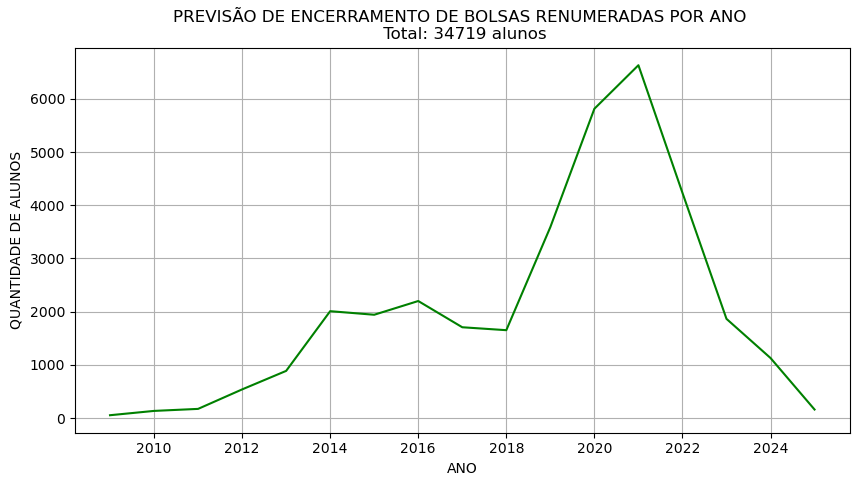

In [123]:
plotagem_um_um = df_um.copy()
plotagem_um_um.groupby('Data Fim')['Contagem'].sum().plot(color='green', figsize=(10,5), grid=True)

plt.title('PREVISÃO DE ENCERRAMENTO DE BOLSAS RENUMERADAS POR ANO \n Total: ' + str(df_um['Contagem'].sum()) + ' alunos')
plt.xlabel('ANO')
plt.ylabel('QUANTIDADE DE ALUNOS')
plt.show()

## Cruzando os dois conjuntos de Dados

A manipulação de Conjunto de Dados é essencial em análises de Ciência de Dados para obter insights mais específicos e que consiga desenvolver novas estratégias e tomadas de decisão.

### Questões Norteadoras

1. Quais Bolsistas e Voluntários de IC que recebem bolsas renumeradas?

In [124]:
mista = pd.merge(df, df_um, on="Bolsista") #Função para coletar informações das duas csv usando o conceito de inner

In [125]:
mista.drop_duplicates() ##Função que elimina as duplicatas

,Bolsista,Curso_x,Ano,Departamento,Fomento,Tipo de Aluno,Contagem_x,Unidade,Curso_y,Categoria da Bolsa,Data de Inicio,Data Fim,Contagem_y
0,AGUINALDO MEDEIROS BOLDRINI,HISTORIA,2017,DEHIS,CNPQ,BOLSISTA,1,IFAC,HISTORIA ...,PERMANENCIA,2014,2017.0,1
1,ALBA LARISSA DOS SANTOS ESPERIDIAO,MEDICINA,2017,DECME,UFOP,BOLSISTA,1,IFAC,MEDICINA ...,PERMANENCIA,2014,2014.0,1
3,ALBA LARISSA DOS SANTOS ESPERIDIAO,MEDICINA,2017,DECME,UFOP,BOLSISTA,1,IFAC,MEDICINA ...,PERMANENCIA,2017,2017.0,1
4,ALBA LARISSA DOS SANTOS ESPERIDIAO,MEDICINA,2017,DECME,UFOP,BOLSISTA,1,IFAC,MEDICINA,PERMANENCIA,2014,2020.0,1
10,ALCIMAR RODRIGUES,CIENCIA E TECNOLOGIA DE ALIMENTOS,2017,DEALI,UFOP,VOLUNTÁRIO,1,IFAC,CIENCIA E TECNOLOGIA DE ALIMENTOS ...,PERMANENCIA,2013,2016.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8944,FERNANDA LIMA ALVARES DA SILVA,LETRAS,2021,DELET,UFOP,BOLSISTA,1,ICHS,LETRAS,PERMANENCIA,2019,2021.0,1
8948,ALICE SILVEIRA DA SILVA,LETRAS,2021,DELET,UFOP,BOLSISTA,1,ICHS,LETRAS ...,PERMANENCIA,2017,2019.0,1
8949,ALICE SILVEIRA DA SILVA,LETRAS,2021,DELET,UFOP,BOLSISTA,1,ICHS,LETRAS,PERMANENCIA,2017,2019.0,1
8950,ALICE SILVEIRA DA SILVA,LETRAS,2021,DELET,UFOP,BOLSISTA,1,ICHS,LETRAS,PERMANENCIA,2020,2022.0,1


In [126]:
mista['Bolsista'].nunique() #remove dados duplicados de uma determinada coluna independente do dataframe


953

<div class="alert alert-block alert-success"
     <b>o total de bolsistas contemplados com bolsas renumeradas são 953 alunos.</b>
</div>

O armazenamento dos anos estão organizados por questão de semestre e também pela situação do aluno em relação á universidade, como por exemplo, determinado aluno trancou o semestre e retornou no seguinte apresenta esses anos computados na database do portal.

Diante dessa analogia, os nomes repetidos após a utilização da função merge significa que um mesmo aluno possui diferentes bolsas e categorias de bolsas renumeradas diferentes, fazendo com que seu nome se repita e não seja confundido como uma réplica de outra linha do dataframe gerado.

## Execução

Após dois testes pilotos com resultados positivos para nortear a solução das questões propostas para esse projeto de pesquisa, começaremos a fazer o tratamento e a limpeza de dados dos conjuntos de dados restantes.

## Conjunto de Dados Projetos de Pesquisa

In [127]:
path_dois = r"D:\UFOP\Horas Complementares\Projetos de Extensão\IC\Dataset\projetos_pesquisa.csv" #Endereço do csv para leitura

In [128]:
df_dois = pd.read_csv(path_dois, sep=';', encoding='UTF-8') # Conversão de CSV para o padrão UTF-8

In [129]:
df_dois

,titulo,situacao,ano,data_inicio,data_fim,natureza,equipe_servidor,equipe_aluno_graduacao,equipe_aluno_posgraduacao,equipe_colaborador
0,A HISTÓRIA DA EDUCAÇÃO NA ÁFRICA A PARTIR DOS ...,EM ANDAMENTO,2019,21/02/2019,21/03/2021,INSTITUCIONAL,JULIANA CESARIO HAMDAN(COORDENADOR UFOP);,NÃO POSSUI,JOATAN NUNES MACHADO JUNIOR(ALUNO DE MESTRADO ...,NaN
1,AMBIENTES DEPOSICIONAIS NO GRUPO BAURU E SEU U...,EM ANDAMENTO,2019,19/03/2019,19/09/2021,INSTITUCIONAL,ANDRE MARCONATO(COORDENADOR UFOP);,NÃO POSSUI,NÃO POSSUI,NaN
2,ASPECTOS SOCIOCULTURAIS E HISTÓRICOS DA MATEMÁ...,EM ANDAMENTO,2019,26/02/2019,SEM PREVISÃO,INSTITUCIONAL,MARGER DA CONCEICAO VENTURA VIANA(COLABORADOR ...,NÃO POSSUI,NÃO POSSUI,NaN
3,ESTADO DO CONHECIMENTO DAS PESQUISAS BRASILEIR...,EM ANDAMENTO,2019,01/01/2019,SEM PREVISÃO,INTERINSTITUCIONAL,DOUGLAS DA SILVA TINTI(COORDENADOR UFOP);,GUILHERME OLIVEIRA DE SOUZA,NÃO POSSUI,ERICA MARIA DE QUEIROZ(COLABORADOR EXTERNO);
4,EVOLUÇÃO DO COMPORTAMENTO DE TANATOSE EM FORMI...,EM ANDAMENTO,2019,01/01/2019,31/12/2022,INSTITUCIONAL,DANON CLEMES CARDOSO(COLABORADOR INSTITUCIONAL...,NÃO POSSUI,NÃO POSSUI,NaN
...,...,...,...,...,...,...,...,...,...,...
1683,CORANTES NATURAIS PARA ALIMENTOS,CONCLUÍDO,1994,01/03/1994,SEM PREVISÃO,INTERINSTITUCIONAL,TANUS JORGE NAGEM(COORDENADOR UFOP);,NÃO POSSUI,NÃO POSSUI,NaN
1684,OBTENÇÃO E CARACTERIZAÇÃO BIOLÀGICA E BIOQUÍMI...,CONCLUÍDO,1993,01/01/1993,SEM PREVISÃO,INSTITUCIONAL,MARTA DE LANA(COORDENADOR UFOP);,NÃO POSSUI,NÃO POSSUI,NaN
1685,ANÁLISE NUMÉRICA DE PROBLEMAS DE ADENSAMENTO,CONCLUÍDO,1992,02/01/1992,SEM PREVISÃO,INSTITUCIONAL,CHRISTIANNE DE LYRA NOGUEIRA(COORDENADOR UFOP);,NÃO POSSUI,NÃO POSSUI,NaN
1686,PRINCIPIOS CONSTITUCIONAIS DO PROCESSO CIVIL,CONCLUÍDO,1992,01/09/1992,01/09/2000,INSTITUCIONAL,MAGID NAUEF LAUAR(COORDENADOR UFOP);,NÃO POSSUI,NÃO POSSUI,NaN


### Operações Básicas

In [130]:
df_dois.info() #Informações sobre as colunas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1688 entries, 0 to 1687
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   titulo                     1688 non-null   object
 1   situacao                   1688 non-null   object
 2   ano                        1688 non-null   int64 
 3   data_inicio                1688 non-null   object
 4   data_fim                   1688 non-null   object
 5   natureza                   1688 non-null   object
 6   equipe_servidor            1489 non-null   object
 7   equipe_aluno_graduacao     1688 non-null   object
 8   equipe_aluno_posgraduacao  1688 non-null   object
 9   equipe_colaborador         147 non-null    object
dtypes: int64(1), object(9)
memory usage: 132.0+ KB


In [131]:
df_dois.shape #Tamanho da base de dados: número de linhas e número de colunas

(1688, 10)

In [132]:
df_dois.columns #Saber o nome das colunas

Index(['titulo', 'situacao', 'ano', 'data_inicio', 'data_fim', 'natureza',
       'equipe_servidor', 'equipe_aluno_graduacao',
       'equipe_aluno_posgraduacao', 'equipe_colaborador'],
      dtype='object')

In [133]:
df_dois['data_inicio'].min() #menor data de inicio do dataframe

'01/01/1993'

In [134]:
df_dois['data_inicio'].max() #maior data de inicio do dataframe

'31/10/2018'

In [135]:
df_dois['data_fim'].min() #menor data fim do dataframe

'01/01/2001'

In [136]:
df_dois['data_fim'].max() #maior data fim do dataframe

'SEM PREVISÃO'

### Limpeza de Dados

In [137]:
#Inserindo coluna para contagem para facilitar nas análises
df_dois['Contagem'] = 1

In [138]:
#Removendo colunas que não serão necessárias
df_dois.drop(['titulo', 'equipe_servidor', 'equipe_colaborador'],axis=1, inplace=True) 

In [139]:
df_dois.columns = ['Situação','Ano','Data de Inicio','Data Fim','Natureza','Aluno de Graduação', 'Aluno de Pós - Graduação', 'Contagem'] #Renomeando colunas

In [140]:
df_dois

,Situação,Ano,Data de Inicio,Data Fim,Natureza,Aluno de Graduação,Aluno de Pós - Graduação,Contagem
0,EM ANDAMENTO,2019,21/02/2019,21/03/2021,INSTITUCIONAL,NÃO POSSUI,JOATAN NUNES MACHADO JUNIOR(ALUNO DE MESTRADO ...,1
1,EM ANDAMENTO,2019,19/03/2019,19/09/2021,INSTITUCIONAL,NÃO POSSUI,NÃO POSSUI,1
2,EM ANDAMENTO,2019,26/02/2019,SEM PREVISÃO,INSTITUCIONAL,NÃO POSSUI,NÃO POSSUI,1
3,EM ANDAMENTO,2019,01/01/2019,SEM PREVISÃO,INTERINSTITUCIONAL,GUILHERME OLIVEIRA DE SOUZA,NÃO POSSUI,1
4,EM ANDAMENTO,2019,01/01/2019,31/12/2022,INSTITUCIONAL,NÃO POSSUI,NÃO POSSUI,1
...,...,...,...,...,...,...,...,...
1683,CONCLUÍDO,1994,01/03/1994,SEM PREVISÃO,INTERINSTITUCIONAL,NÃO POSSUI,NÃO POSSUI,1
1684,CONCLUÍDO,1993,01/01/1993,SEM PREVISÃO,INSTITUCIONAL,NÃO POSSUI,NÃO POSSUI,1
1685,CONCLUÍDO,1992,02/01/1992,SEM PREVISÃO,INSTITUCIONAL,NÃO POSSUI,NÃO POSSUI,1
1686,CONCLUÍDO,1992,01/09/1992,01/09/2000,INSTITUCIONAL,NÃO POSSUI,NÃO POSSUI,1


In [141]:
#Removendo informações adicionais entre parênteses e separando dados por ; na coluna alunos de Graduação
df_dois['coluna_nova'] = df_dois['Aluno de Graduação'].str.replace(r'\(.*\)', '')
df_dois = df_dois.drop('Aluno de Graduação', axis=1)
df_dois = df_dois.rename(columns={'coluna_nova': 'Aluno de Graduação'})
df_dois['Aluno de Graduação'] = df_dois['Aluno de Graduação'].str.split(';')
df_dois = df_dois.explode('Aluno de Graduação')

C:\Users\Ryan\AppData\Local\Temp\ipykernel_8756\1622932080.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_dois['coluna_nova'] = df_dois['Aluno de Graduação'].str.replace(r'\(.*\)', '')


In [142]:
#Removendo informações adicionais entre parênteses e separando dados por ; na coluna alunos de Pós - Graduação
df_dois['coluna_nova'] = df_dois['Aluno de Pós - Graduação'].str.replace(r'\(.*\)', '')
df_dois = df_dois.drop('Aluno de Pós - Graduação', axis=1)
df_dois = df_dois.rename(columns={'coluna_nova': 'Aluno de Pós - Graduação'})
df_dois['Aluno de Pós - Graduação'] = df_dois['Aluno de Pós - Graduação'].str.split(';')
df_dois = df_dois.explode('Aluno de Pós - Graduação')

C:\Users\Ryan\AppData\Local\Temp\ipykernel_8756\868428240.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_dois['coluna_nova'] = df_dois['Aluno de Pós - Graduação'].str.replace(r'\(.*\)', '')


<div class="alert alert-block alert-warning"
     <b> O aviso de vermelho nas funções acima é só para informar que não há como recuperar a formatação anterior devido a manipulação direta no arquivo csv. </b>
</div>

<div class="alert alert-block alert-info"
     <b> Observação: As funções acima foram utilizadas devido a que o nome dos alunos de graduação e pós - graduação envolvidos num determinado projeto de pesquisa não seriam contabilizados na hora de puxar seu nome em outros dataframes necessários para as respostas das questões norteadoras do projeto. </b>
</div>

In [143]:
#Removendo projetos de pesquisa sem alunos de graduação e de pós - graduação
df_dois = df_dois.drop(df_dois[(df_dois['Aluno de Pós - Graduação'] == 'NÃO POSSUI') & (df_dois['Aluno de Graduação'] == 'NÃO POSSUI')].index)


<div class="alert alert-block alert-info"
     <b> Observação: A função acima foi utilizada pois não é interessante incluir na solução das questões norteadoras projetos de pesquisa que não possui alunos de graduação e nem alunos de pós - graduação. </b>
</div>

In [144]:
df_dois

,Situação,Ano,Data de Inicio,Data Fim,Natureza,Contagem,Aluno de Graduação,Aluno de Pós - Graduação
0,EM ANDAMENTO,2019,21/02/2019,21/03/2021,INSTITUCIONAL,1,NÃO POSSUI,JOATAN NUNES MACHADO JUNIOR
0,EM ANDAMENTO,2019,21/02/2019,21/03/2021,INSTITUCIONAL,1,NÃO POSSUI,
3,EM ANDAMENTO,2019,01/01/2019,SEM PREVISÃO,INTERINSTITUCIONAL,1,GUILHERME OLIVEIRA DE SOUZA,NÃO POSSUI
6,EM ANDAMENTO,2018,01/08/2018,SEM PREVISÃO,INSTITUCIONAL,1,MARIANA SILVA BERNADES,DAYANE DE OLIVEIRA GONCALVES
7,EM ANDAMENTO,2018,01/08/2018,SEM PREVISÃO,INSTITUCIONAL,1,YURI MOURA LIMA AMARAL DE SOUZA,DAYANE DE OLIVEIRA GONCALVES
...,...,...,...,...,...,...,...,...
1633,CONCLUÍDO,1998,01/04/1998,01/06/1999,INSTITUCIONAL,1,LIZANDRE CAROLINE BARBOSA JAGER,NÃO POSSUI
1666,CONCLUÍDO,1997,01/08/1997,30/07/1998,INSTITUCIONAL,1,FABIOLA BATISTA PIRES TROPIA ALESSANDRO SILVA ...,NÃO POSSUI
1672,CONCLUÍDO,1996,01/03/1996,31/12/2006,INSTITUCIONAL,1,VANDERSON ENEY DE MATOS,NÃO POSSUI
1680,CONCLUÍDO,1995,01/03/1995,SEM PREVISÃO,INTERINSTITUCIONAL,1,RENATA REBECA PEREIRA LUISAUREA VIANA MAXIMO,ANTÔNIO HELVÉCIO TÓTOLA


### Questões Norteadoras

1. Qual o quadro de situação dos projetos de pesquisa até o momento?

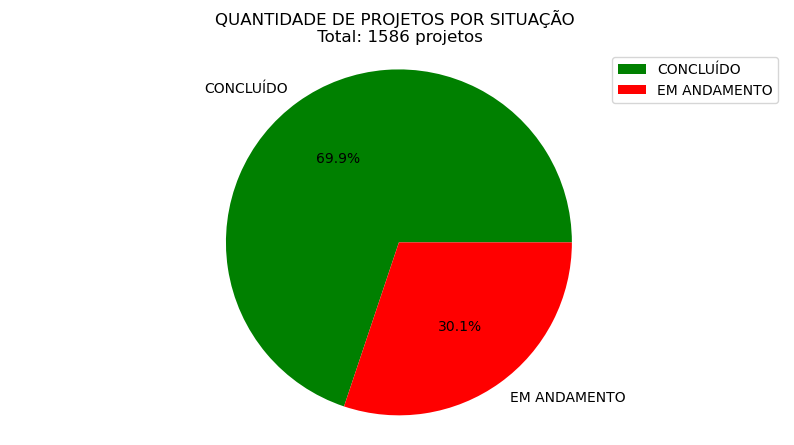

In [145]:
grafico_df_dois = df_dois.groupby('Situação')['Contagem'].sum().plot(kind='pie', figsize=(10,5), colors='green', autopct='%1.1f%%')

plt.axis('equal')
plt.legend(loc='upper right')
plt.xlabel('')
plt.ylabel('')
plt.title('QUANTIDADE DE PROJETOS POR SITUAÇÃO \n Total: ' + str(df_dois['Contagem'].sum()) + ' projetos')
plt.show()

2. Quantos alunos de graduação fazem projetos de pesquisa?

In [146]:
aluno_graduacao = df_dois[df_dois['Aluno de Graduação'] != 'NÃO POSSUI']['Contagem']
soma = aluno_graduacao.sum()
print(soma)

1448


3. Quantos alunos de pós - graduação fazem projetos de pesquisa?

In [147]:
aluno_pos_graduacao = df_dois[df_dois['Aluno de Pós - Graduação'] != 'NÃO POSSUI']['Contagem']
soma_um = aluno_pos_graduacao.sum()
print(soma_um)

395


4. Qual a progressão por ano em relação aos projetos de pesquisa?

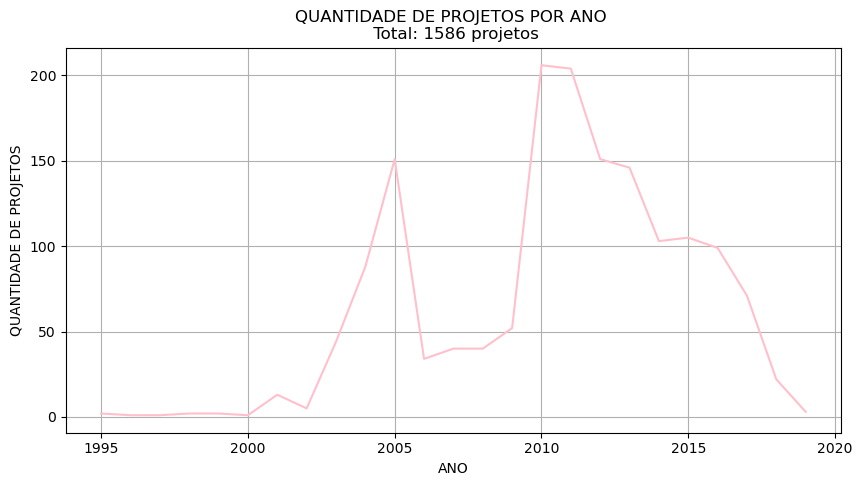

In [148]:
plotagem_um_dois = df_dois.copy()
plotagem_um_dois.groupby('Ano')['Contagem'].sum().plot(color='pink', figsize=(10,5), grid=True)

plt.title('QUANTIDADE DE PROJETOS POR ANO \n Total: ' + str(df_dois['Contagem'].sum()) + ' projetos')
plt.xlabel('ANO')
plt.ylabel('QUANTIDADE DE PROJETOS')
plt.show()

5. Quantos alunos de graduação que possuem projetos de pesquisa recebem bolsas renumeradas?

In [149]:
ocorrencias = df_dois['Aluno de Graduação'].astype(str).isin(df_um['Bolsista'].astype(str))
quantidade = ocorrencias.sum()
print(quantidade)

183


6. Quantos alunos de pós - graduação que possuem projetos de pesquisa recebem bolsas renumeradas?

In [150]:
ocorrencias_um = df_dois['Aluno de Pós - Graduação'].astype(str).isin(df_um['Bolsista'].astype(str))
quantidade_um = ocorrencias_um.sum()
print(quantidade_um)

11


## Conjunto de Dados Alunos de Pós - Graduação

In [151]:
path_tres = r"D:\UFOP\Horas Complementares\Projetos de Extensão\IC\Dataset\alunos_pos_graduacao.csv" #Endereço do csv para leitura

In [152]:
df_tres = pd.read_csv(path_tres, sep=';', encoding='UTF-8') # Conversão de CSV para o padrão UTF-8

In [153]:
df_tres

,nome,programa,nivel,data_ingresso,data_defesa,orientador,situacao
0,ABEL ANASTACIO DE ARAUJO JUNIOR,GESTÃO DE POLÍTICAS PÚBLICAS COM ÊNFASE EM GÊN...,ESPECIALIZAÇÃO,24/02/2011,NÃO REGISTRADO,NaN,EVADIDO
1,ABELARD RAMOS FERNANDES,GESTÃO PÚBLICA,ESPECIALIZAÇÃO,29/08/2009,15/07/2011,IRCE FERNANDES GOMES GUIMARAES,TITULADO
2,ABIATAR DAVID DE SOUZA MACHADO,FILOSOFIA: ESTÉTICA E FILOSOFIA DA ARTE,MESTRADO ACADÊMICO,01/10/2010,21/08/2013,JOSE LUIZ FURTADO,TITULADO
3,ABILIO CESAR SOARES DE AZEVEDO,SUSTENTABILIDADE SOCIOECONÔMICA AMBIENTAL,MESTRADO PROFISSIONAL,01/03/2008,NÃO REGISTRADO,AUXILIADORA MARIA MOURA SANTI,EVADIDO
4,ACÁCIA ANTÔNIA GOMES DE OLIVEIRA SILVA,SAÚDE E NUTRIÇÃO,MESTRADO ACADÊMICO,25/02/2015,27/11/2017,LUANA GIATTI GONCALVES,TITULADO
...,...,...,...,...,...,...,...
16210,ZULEICA GLORIA BICALHO,PRÁTICAS PEDAGÓGICAS,ESPECIALIZAÇÃO,23/11/2010,NÃO REGISTRADO,NaN,EVADIDO
16211,ZULEICA MARIA TASSOTE DOS REIS,PRÁTICAS PEDAGÓGICAS,ESPECIALIZAÇÃO,18/11/2010,NÃO REGISTRADO,NaN,EVADIDO
16212,ZULEIDE ANTONIA RISSO,MÍDIAS NA EDUCAÇÃO,ESPECIALIZAÇÃO,09/05/2014,17/10/2015,JULIANA CESARIO HAMDAN,TITULADO
16213,ZULMIRA ALVES PÊGO,GESTÃO ESCOLAR,ESPECIALIZAÇÃO,20/11/2013,28/03/2015,ADRIANA OTONI SILVA ANTUNES DUARTE,TITULADO


In [154]:
df_tres.info() #Informações sobre as colunas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16215 entries, 0 to 16214
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   nome           16215 non-null  object
 1   programa       16215 non-null  object
 2   nivel          16215 non-null  object
 3   data_ingresso  16215 non-null  object
 4   data_defesa    16215 non-null  object
 5   orientador     10793 non-null  object
 6   situacao       16215 non-null  object
dtypes: object(7)
memory usage: 886.9+ KB


In [155]:
df_tres.shape #Tamanho da base de dados: número de linhas e número de colunas

(16215, 7)

In [156]:
df_tres.columns #Saber o nome das colunas

Index(['nome', 'programa', 'nivel', 'data_ingresso', 'data_defesa',
       'orientador', 'situacao'],
      dtype='object')

In [157]:
df_tres['data_ingresso'].min() #menor data de ingresso do dataframe

'01/01/2008'

In [158]:
df_tres['data_ingresso'].max() #maior data de ingresso do dataframe

'31/12/2007'

### Limpeza de Dados

In [159]:
#Inserindo coluna para contagem para facilitar nas análises
df_tres['Contagem'] = 1

In [160]:
#Removendo colunas que não serão necessárias
df_tres.drop(['programa', 'orientador'],axis=1, inplace=True) 

In [161]:
df_tres.columns = ['Nome','Nível','Data de Ingresso','Data de Defesa','Situação', 'Contagem'] #Renomeando colunas

In [162]:
df_tres

,Nome,Nível,Data de Ingresso,Data de Defesa,Situação,Contagem
0,ABEL ANASTACIO DE ARAUJO JUNIOR,ESPECIALIZAÇÃO,24/02/2011,NÃO REGISTRADO,EVADIDO,1
1,ABELARD RAMOS FERNANDES,ESPECIALIZAÇÃO,29/08/2009,15/07/2011,TITULADO,1
2,ABIATAR DAVID DE SOUZA MACHADO,MESTRADO ACADÊMICO,01/10/2010,21/08/2013,TITULADO,1
3,ABILIO CESAR SOARES DE AZEVEDO,MESTRADO PROFISSIONAL,01/03/2008,NÃO REGISTRADO,EVADIDO,1
4,ACÁCIA ANTÔNIA GOMES DE OLIVEIRA SILVA,MESTRADO ACADÊMICO,25/02/2015,27/11/2017,TITULADO,1
...,...,...,...,...,...,...
16210,ZULEICA GLORIA BICALHO,ESPECIALIZAÇÃO,23/11/2010,NÃO REGISTRADO,EVADIDO,1
16211,ZULEICA MARIA TASSOTE DOS REIS,ESPECIALIZAÇÃO,18/11/2010,NÃO REGISTRADO,EVADIDO,1
16212,ZULEIDE ANTONIA RISSO,ESPECIALIZAÇÃO,09/05/2014,17/10/2015,TITULADO,1
16213,ZULMIRA ALVES PÊGO,ESPECIALIZAÇÃO,20/11/2013,28/03/2015,TITULADO,1


### Questões Norteadoras

1. Qual a quantidade de alunos por nível de pós - graduação?

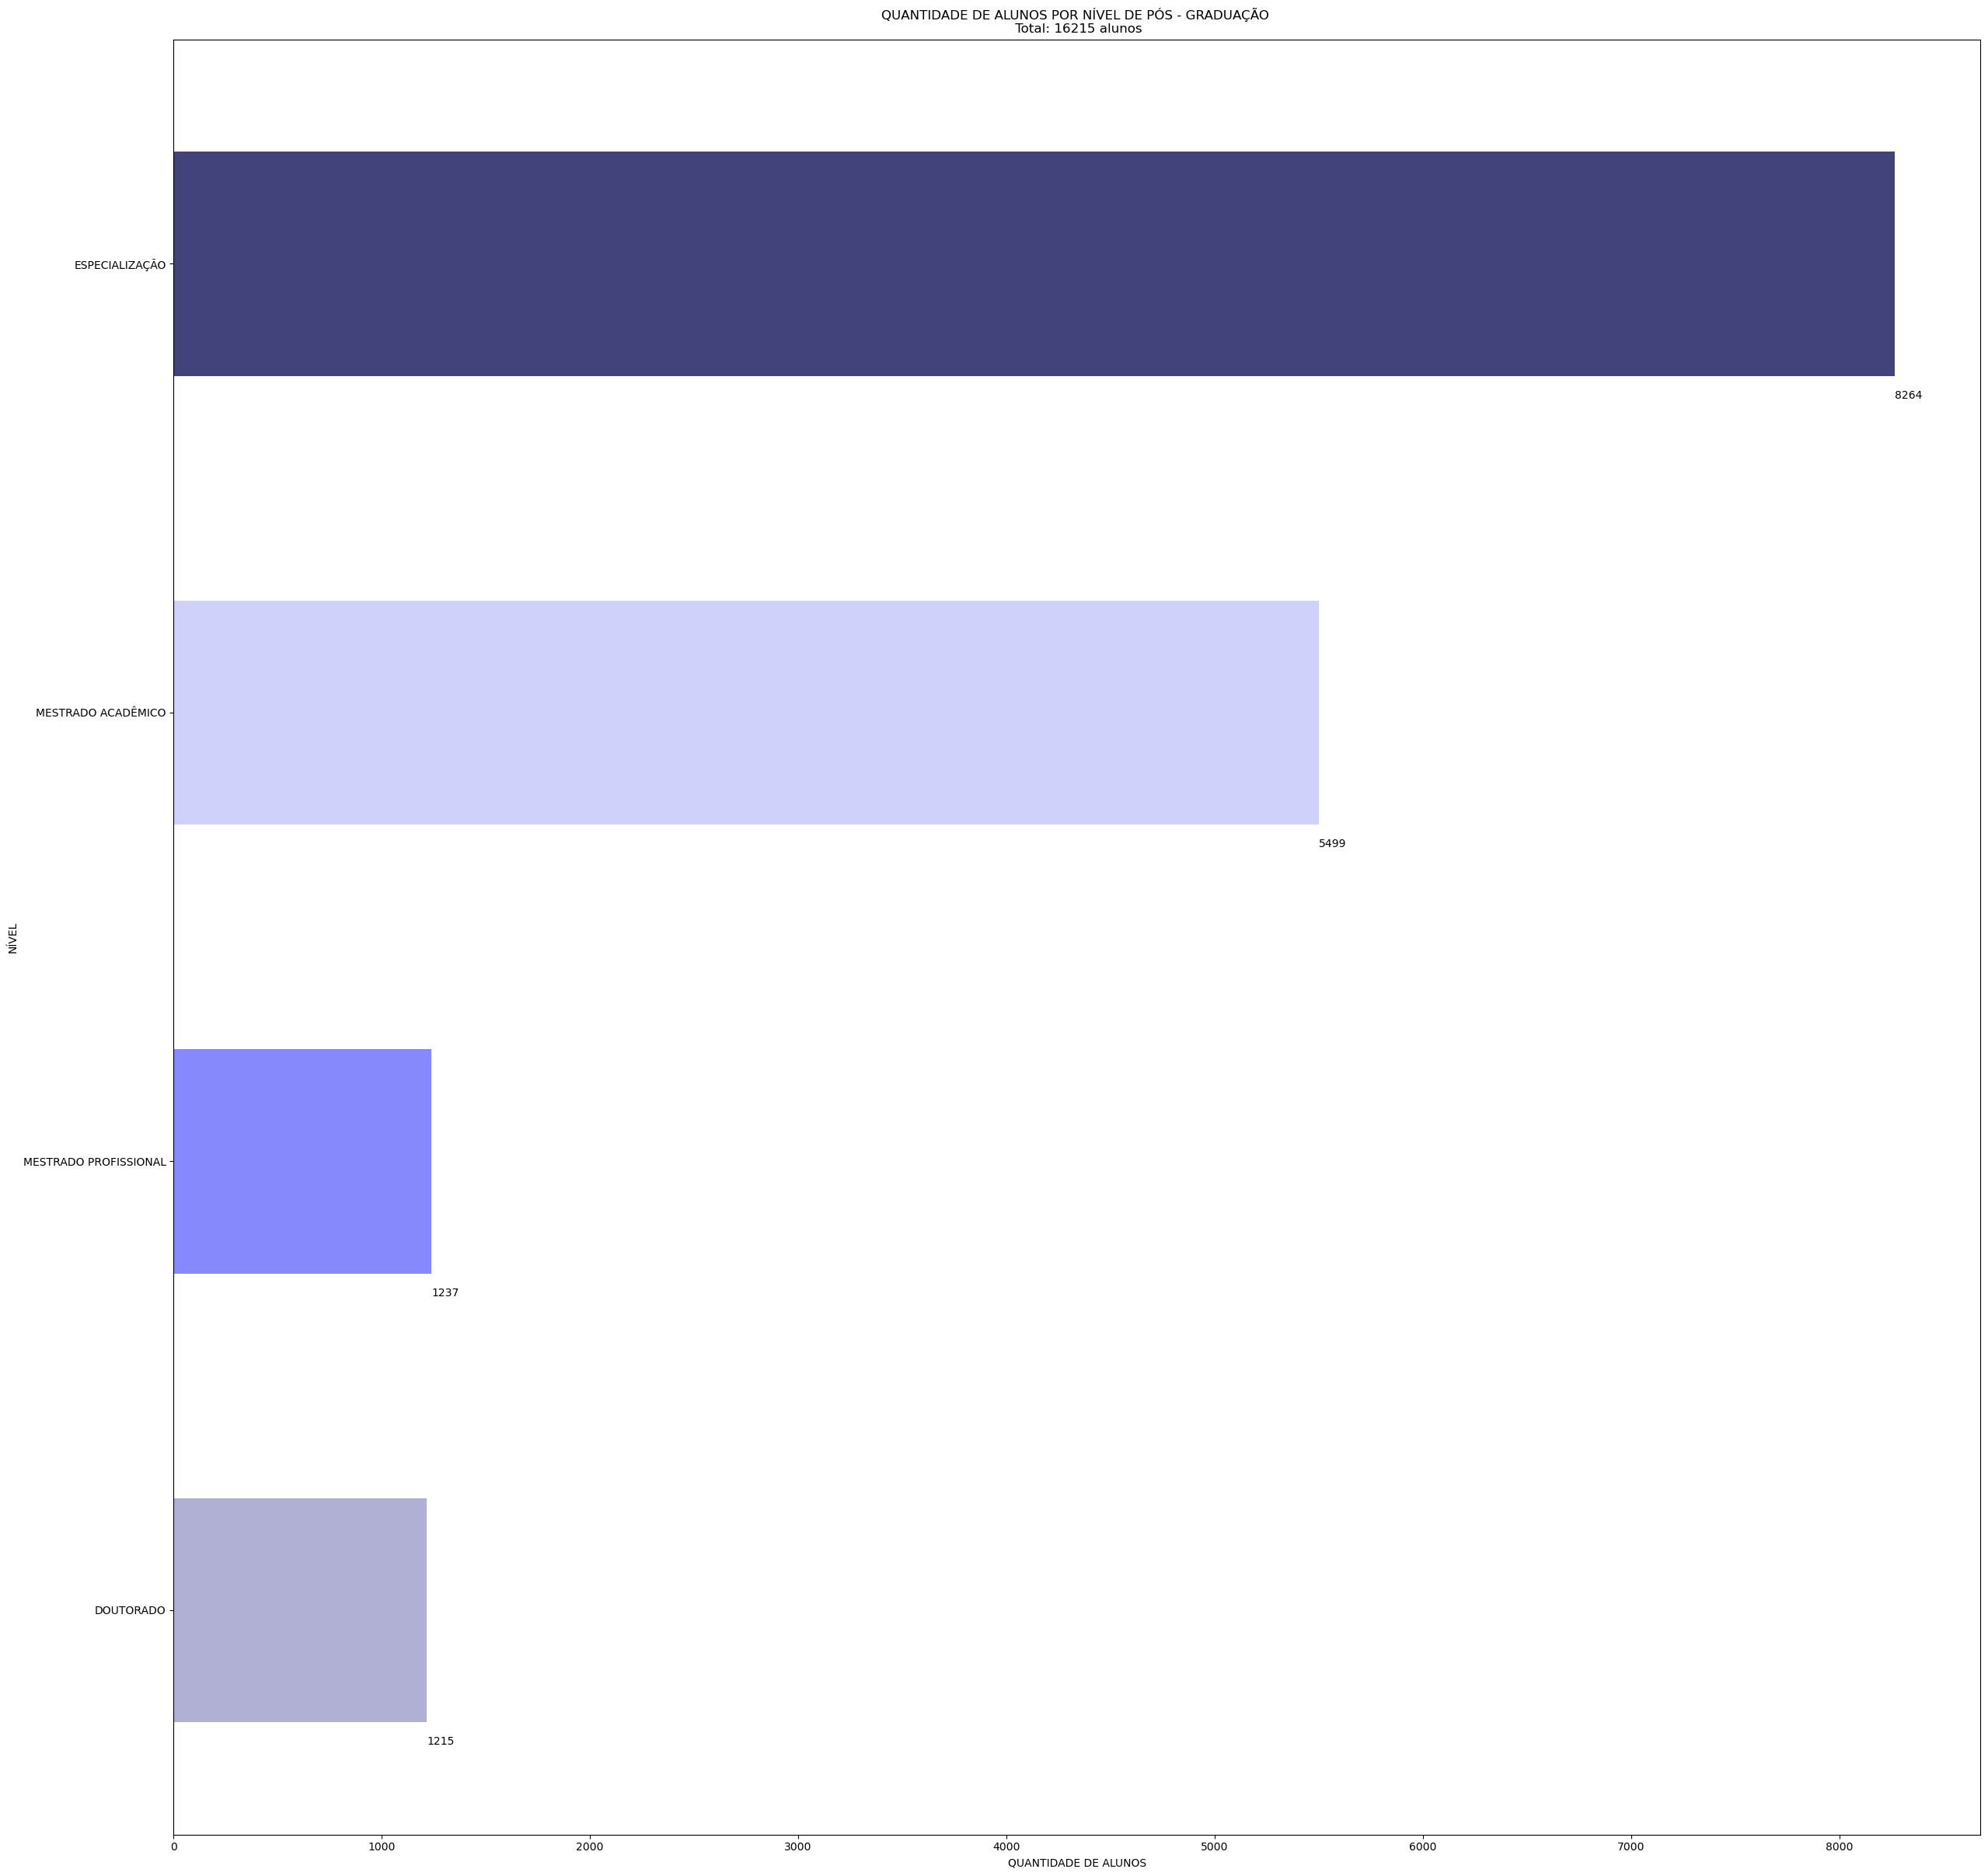

In [163]:
histograma_tres = df_tres.groupby('Nível')['Contagem'].sum().sort_values().plot(kind='barh', color=random.choice(colors), figsize=(30,30))

for p in histograma_tres.patches:
    b=p.get_bbox()
    histograma_tres.annotate("{:.0f}".format(b.x1 + b.x0), (p.get_x() + p.get_width() + 1, p.get_y() - 0.05))

plt.title('QUANTIDADE DE ALUNOS POR NÍVEL DE PÓS - GRADUAÇÃO \n Total: ' + str(df_tres['Contagem'].sum()) + ' alunos')
plt.ylabel('NÍVEL')
plt.xlabel('QUANTIDADE DE ALUNOS')
plt.show()

2. Qual a quantidade de alunos em relação a situação na pós - graduação?

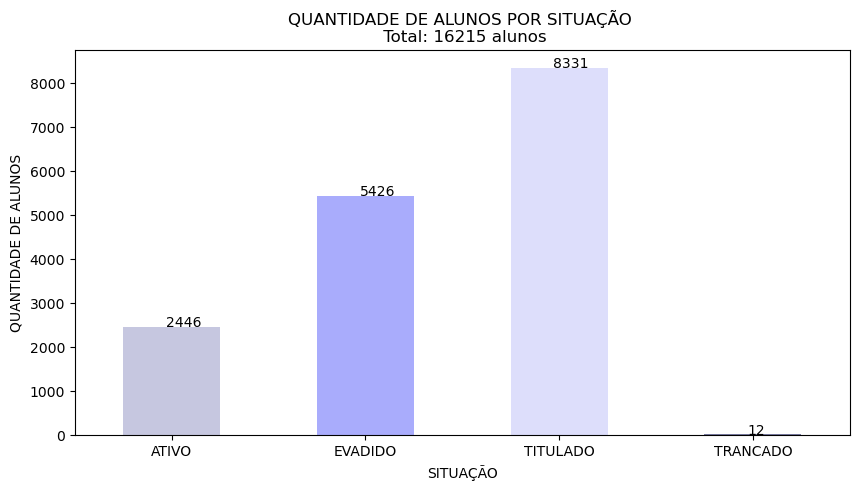

In [164]:
grafico_df_tres = df_tres.groupby('Situação')['Contagem'].sum().plot(kind='bar', figsize=(10,5), color=random.choice(colors), alpha=.7)

for p in grafico_df_tres.patches:
    b=p.get_bbox()
    grafico_df_tres.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.03, b.y1 + 15))

plt.xticks(rotation=0)
plt.xlabel('SITUAÇÃO')
plt.ylabel('QUANTIDADE DE ALUNOS')
plt.title('QUANTIDADE DE ALUNOS POR SITUAÇÃO \n Total: ' + str(df_tres['Contagem'].sum()) + ' alunos')
plt.show()


3. Qual a quantidade de alunos de pós - graduação receberam bolsas de assistência estudantil durante a graduação?

In [165]:
ocorrencias_dois = df_tres['Nome'].astype(str).isin(df_um['Bolsista'].astype(str))
quantidade_dois = ocorrencias_dois.sum()
print(quantidade_um)

11


4. Qual a quantidade de alunos de pós - graduação fizeram iniciação científica durante a graduação?

In [166]:
ocorrencias_tres = df_tres['Nome'].astype(str).isin(df['Bolsista'].astype(str))
quantidade_tres = ocorrencias_tres.sum()
print(quantidade_tres)

201


## Conjunto de Dados Voluntários

In [167]:
path_quatro = r"D:\UFOP\Horas Complementares\Projetos de Extensão\IC\Dataset\voluntarios.csv" #Endereço do csv para leitura

In [168]:
df_quatro = pd.read_csv(path_quatro, sep=';', encoding='UTF-8') # Conversão de CSV para o padrão UTF-8

In [169]:
df_quatro

,Nome,Curso,Setor,Data_Inicio,Data_Fim,Unnamed: 5
0,DAVID FERREIRA DOS REIS,DIREITO ...,DEDIR,23/04/2021,15/12/2021,NaN
1,LUIZA BORGES POLITA,ENGENHARIA DE COMPUTACAO ...,DECSI,15/06/2021,30/09/2021,NaN
2,LEONARDO MOREIRA SEPULVEDA,SISTEMAS DE INFORMACAO ...,DECSI,15/06/2021,10/12/2021,NaN
3,THAIS SOUTO DAMASCENO,SISTEMAS DE INFORMACAO ...,DECSI,15/06/2021,10/12/2021,NaN
4,GUSTAVO MARQUES DE MELLO,SISTEMAS DE INFORMACAO ...,DECSI,15/06/2021,08/12/2021,NaN
...,...,...,...,...,...,...
5508,OTAVIO ANTONIO PONTES SILVA,ENGENHARIA CIVIL ...,DECIV,02/03/2020,20/12/2020,
5509,LUANA RIBEIRO HESPANHOL,ENGENHARIA CIVIL ...,DECIV,02/03/2020,20/12/2020,
5510,LARISSA SANT ANA MOREIRA MACHADO,ENGENHARIA CIVIL ...,DECIV,02/03/2020,20/12/2020,
5511,DEBORA DE OLIVEIRA BRAGIONI,ENGENHARIA CIVIL ...,DECIV,02/03/2020,20/12/2020,


In [170]:
df_quatro.info() #Informações sobre as colunas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5513 entries, 0 to 5512
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0    Nome        5513 non-null   object
 1   Curso        5512 non-null   object
 2   Setor        5513 non-null   object
 3   Data_Inicio  5513 non-null   object
 4    Data_Fim    5513 non-null   object
 5   Unnamed: 5   1264 non-null   object
dtypes: object(6)
memory usage: 258.5+ KB


In [171]:
df_quatro.shape #Tamanho da base de dados: número de linhas e número de colunas

(5513, 6)

In [172]:
df_quatro.columns #Saber o nome das colunas

Index([' Nome', 'Curso', 'Setor', 'Data_Inicio', ' Data_Fim', 'Unnamed: 5'], dtype='object')

### Limpeza de Dados

In [173]:
#Inserindo coluna para contagem para facilitar nas análises
df_quatro['Contagem'] = 1

In [174]:
df_quatro

,Nome,Curso,Setor,Data_Inicio,Data_Fim,Unnamed: 5,Contagem
0,DAVID FERREIRA DOS REIS,DIREITO ...,DEDIR,23/04/2021,15/12/2021,NaN,1
1,LUIZA BORGES POLITA,ENGENHARIA DE COMPUTACAO ...,DECSI,15/06/2021,30/09/2021,NaN,1
2,LEONARDO MOREIRA SEPULVEDA,SISTEMAS DE INFORMACAO ...,DECSI,15/06/2021,10/12/2021,NaN,1
3,THAIS SOUTO DAMASCENO,SISTEMAS DE INFORMACAO ...,DECSI,15/06/2021,10/12/2021,NaN,1
4,GUSTAVO MARQUES DE MELLO,SISTEMAS DE INFORMACAO ...,DECSI,15/06/2021,08/12/2021,NaN,1
...,...,...,...,...,...,...,...
5508,OTAVIO ANTONIO PONTES SILVA,ENGENHARIA CIVIL ...,DECIV,02/03/2020,20/12/2020,,1
5509,LUANA RIBEIRO HESPANHOL,ENGENHARIA CIVIL ...,DECIV,02/03/2020,20/12/2020,,1
5510,LARISSA SANT ANA MOREIRA MACHADO,ENGENHARIA CIVIL ...,DECIV,02/03/2020,20/12/2020,,1
5511,DEBORA DE OLIVEIRA BRAGIONI,ENGENHARIA CIVIL ...,DECIV,02/03/2020,20/12/2020,,1


In [175]:
df_quatro['Data_Inicio'].min() #menor data de ingresso do dataframe

'01/01/2014'

In [176]:
df_quatro['Data_Inicio'].max() #maior data de ingresso do dataframe

'31/08/2021'

### Questões Norteadoras

1. Qual a progressão de Voluntários por ano?

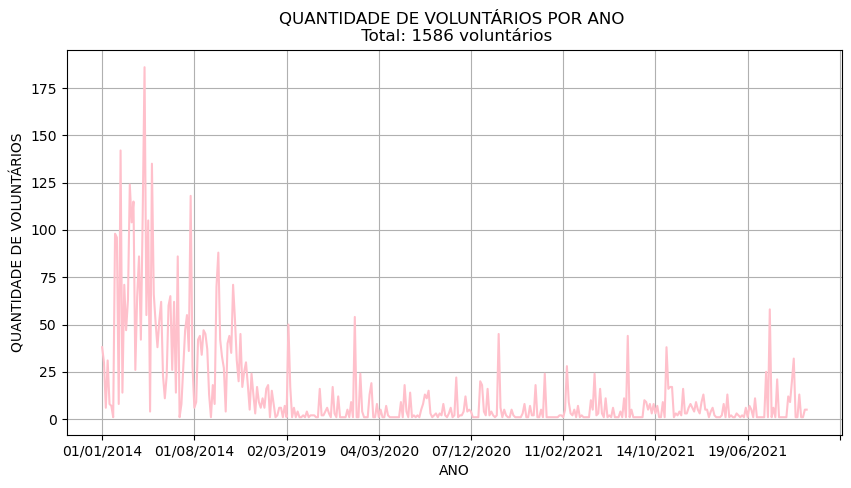

In [177]:
plotagem_um_tres = df_quatro.copy()
plotagem_um_tres.groupby('Data_Inicio')['Contagem'].sum().plot(color='pink', figsize=(10,5), grid=True)

plt.title('QUANTIDADE DE VOLUNTÁRIOS POR ANO \n Total: ' + str(df_dois['Contagem'].sum()) + ' voluntários')
plt.xlabel('ANO')
plt.ylabel('QUANTIDADE DE VOLUNTÁRIOS')
plt.show()

## Conjunto de Dados Bolsistas

In [178]:
path_cinco = r"D:\UFOP\Horas Complementares\Projetos de Extensão\IC\Dataset\bolsistas.csv" #Endereço do csv para leitura

In [179]:
df_cinco = pd.read_csv(path_cinco, sep=';', encoding='UTF-8') # Conversão de CSV para o padrão UTF-8

In [180]:
df_cinco

,NOME,CURSO,SETOR,DATA INICIO,DATA FIM
0,THAIS BARRETO SANTANA,ENGENHARIA AMBIENTAL,PROEX,04/01/2021,31/12/2021
1,IGOR HENRIQUE DA COSTA,EDUCACAO FISICA,DEEF,01/04/2021,17/12/2021
2,NATALIA SANTOS SILVA,JORNALISMO,DEQUI,01/12/2021,31/12/2021
3,ANA BARBARA DE ALBUQUERQUE DAROWISH PEREIRA,ENGENHARIA AMBIENTAL,DEQUI,01/12/2021,31/12/2021
4,KINDERLLY LIMA BRANDAO,JORNALISMO,DEQUI,01/12/2021,31/12/2021
...,...,...,...,...,...
5710,PEDRO HENRIKY ASSIS,EDUCACAO FISICA ...,DEMIN,01/03/2019,31/12/2019
5711,FELIPE CARDOSO LIMA MOLINARI,ENGENHARIA DE COMPUTACAO ...,DECSI,01/03/2019,31/12/2019
5712,ANA LUIZA FREITAS FRANCA SILVA,LETRAS ...,DEACL,01/03/2019,30/11/2019
5713,ANA LUIZA SILVA SANTOS FELIX,ENGENHARIA URBANA ...,DEURB,01/03/2019,31/12/2019


In [181]:
df_cinco.info() #Informações sobre as colunas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5715 entries, 0 to 5714
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   NOME         5715 non-null   object
 1   CURSO        5715 non-null   object
 2   SETOR        5715 non-null   object
 3   DATA INICIO  5715 non-null   object
 4   DATA FIM     5713 non-null   object
dtypes: object(5)
memory usage: 223.4+ KB


In [182]:
df_cinco.shape #Tamanho da base de dados: número de linhas e número de colunas

(5715, 5)

In [183]:
df_cinco.columns #Saber o nome das colunas

Index(['NOME', 'CURSO', 'SETOR', 'DATA INICIO', 'DATA FIM'], dtype='object')

### Limpeza de Dados

In [184]:
#Inserindo coluna para contagem para facilitar nas análises
df_cinco['Contagem'] = 1

In [185]:
df_cinco['DATA INICIO'].min() #menor data de ingresso do dataframe

'01/01/2014'

In [186]:
df_cinco['DATA INICIO'].min()

'01/01/2014'

In [187]:
df_cinco['DATA INICIO'].max()

'31/08/2021'

### Questões Norteadoras

1. Qual a progressão de bolsistas por ano?

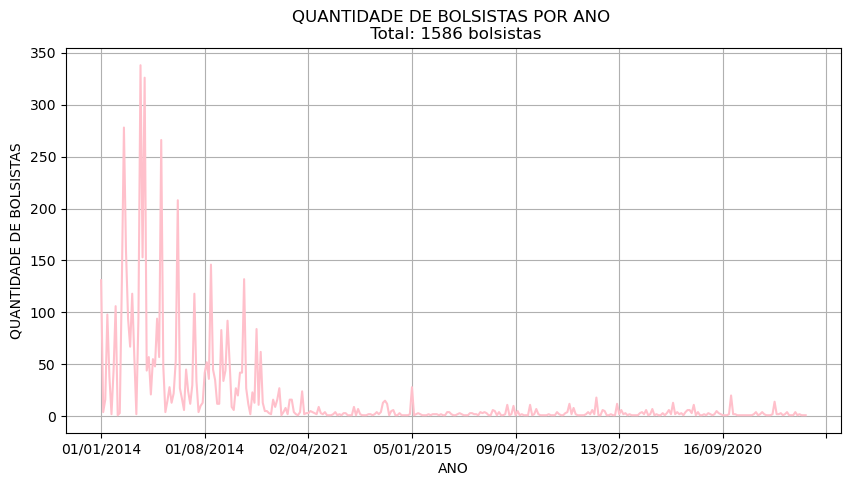

In [188]:
plotagem_um_quatro = df_cinco.copy()
plotagem_um_quatro.groupby('DATA INICIO')['Contagem'].sum().plot(color='pink', figsize=(10,5), grid=True)

plt.title('QUANTIDADE DE BOLSISTAS POR ANO \n Total: ' + str(df_dois['Contagem'].sum()) + ' bolsistas')
plt.xlabel('ANO')
plt.ylabel('QUANTIDADE DE BOLSISTAS')
plt.show()

## Conjunto de Dados Bolsa Alimentação

In [205]:
path_seis = r"D:\UFOP\Horas Complementares\Projetos de Extensão\IC\Dataset\bolsistas-alimentacao.csv" #Endereço do csv para leitura

In [206]:
df_seis = pd.read_csv(path_seis, sep=';', encoding='UTF-8') # Conversão de CSV para o padrão UTF-8

In [207]:
df_seis

,Nome,Codigo Curso,Data Inicio,Data Fim
0,ABIGAIL FONSECA MARTINS LOPES DE LIMA,MIN,19/09/2017,05/03/2018
1,ACUMA MAIA DA SILVA,FLL,19/09/2017,05/03/2018
2,ADAILTON DA SILVA DOMINGOS,FAR,19/09/2017,05/03/2018
3,ADAILTON HENRIQUE DE SOUSA,MET,19/09/2017,05/03/2018
4,ADANNE MARES FERREIRA,NUT,23/02/2018,05/03/2018
...,...,...,...,...
69551,YURI MENDES DA SILVA,EFB,01/08/2019,31/12/2019
69552,YURI SOARES DA SILVA,SER,01/08/2019,31/01/2021
69553,YURI TADRA KUCHENNY,CBB,01/08/2019,31/07/2021
69554,ZAYRA ADRIANA SANTOS DA SILVA,LTB,01/08/2019,30/09/2021


### Limpeza de Dados

In [208]:
df_seis.info() #Informações sobre as colunas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69556 entries, 0 to 69555
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0    Nome          69556 non-null  object
 1    Codigo Curso  69546 non-null  object
 2    Data Inicio   69556 non-null  object
 3    Data Fim      69543 non-null  object
dtypes: object(4)
memory usage: 2.1+ MB


In [209]:
df_seis.shape #Tamanho da base de dados: número de linhas e número de colunas

(69556, 4)

In [210]:
df_seis.columns #Saber o nome das colunas

Index([' Nome', ' Codigo Curso', ' Data Inicio', ' Data Fim'], dtype='object')

In [211]:
#Inserindo coluna para contagem para facilitar nas análises
df_seis['Contagem'] = 1

## Conjunto de Dados Bolsa Transporte

In [212]:
path_sete = r"D:\UFOP\Horas Complementares\Projetos de Extensão\IC\Dataset\bolsistas-transporte.csv" #Endereço do csv para leitura

In [213]:
df_sete = pd.read_csv(path_sete, sep=';', encoding='UTF-8') # Conversão de CSV para o padrão UTF-8

In [214]:
df_sete

,Nome,Codigo,Data Inicio,Data Fim
0,ALANA LUIZA GONCALVES FERREIRA,QUI,25/09/2017,30/09/2017
1,ALESSANDRA NARA GONCALVES,LTL,30/09/2017,24/02/2018
2,ALICE QUEIROZ XAVIER,ARQ,25/09/2017,24/02/2018
3,AMANDA PEDROSO,PED,25/09/2017,24/02/2018
4,ANA CAROLINA BOAVENTURA DE CARVALHO,FAR,25/09/2017,24/02/2018
...,...,...,...,...
7067,MARLON MARTINS CUNHA,AUT,11/03/2019,31/05/2019
7068,NATALIA APARECIDA DE SOUSA MAIA,MTL,11/03/2019,28/02/2020
7069,PALOMA APOLINARIA DE PAIVA GONZAGA,ECO,11/03/2019,26/07/2019
7070,PEDRO HENRIQUE GRIGOLETTO DE SOUZA,ECO,11/03/2019,31/12/2020


### Limpeza de Dados

In [215]:
df_sete.info() #Informações sobre as colunas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7072 entries, 0 to 7071
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0    Nome          7072 non-null   object
 1    Codigo        7072 non-null   object
 2     Data Inicio  7072 non-null   object
 3    Data Fim      7072 non-null   object
dtypes: object(4)
memory usage: 221.1+ KB


In [216]:
df_sete.shape #Tamanho da base de dados: número de linhas e número de colunas

(7072, 4)

In [217]:
df_sete.columns #Saber o nome das colunas

Index([' Nome', ' Codigo', '  Data Inicio', ' Data Fim'], dtype='object')

In [218]:
#Inserindo coluna para contagem para facilitar nas análises
df_sete['Contagem'] = 1

## Conjunto de Dados Bolsa Moradia 

In [219]:
path_oito = r"D:\UFOP\Horas Complementares\Projetos de Extensão\IC\Dataset\moradia.csv" #Endereço do csv para leitura

In [220]:
df_oito = pd.read_csv(path_oito, sep=';', encoding='UTF-8') # Conversão de CSV para o padrão UTF-8

In [221]:
df_oito

,Nome,Moradia,Data da entrada
0,ALINE VELOSO LUZ,APARTAMENTO - BLOCO AZUL - 101,23/03/2022
1,TAYNARA FERNANDES SANTOS,APARTAMENTO - BLOCO AZUL - 101,08/08/2022
2,THAIS DIAS MENDONCA,APARTAMENTO - BLOCO AZUL - 101,01/11/2019
3,EMERSON JOSE DA SILVA,APARTAMENTO - BLOCO AZUL - 102,23/03/2022
4,JOAO PEDRO SILVA COSTA,APARTAMENTO - BLOCO AZUL - 102,01/11/2019
...,...,...,...
3660,WEVERTON HENRIQUE DA SILVA,NÃO INFORMADO,05/06/2019
3661,WILSON MENDES SANTOS,NÃO INFORMADO,18/06/2014
3662,YURI ANDERSON SIMOES PEREIRA,NÃO INFORMADO,18/12/2017
3663,ZAYRA ADRIANA SANTOS DA SILVA,NÃO INFORMADO,05/06/2019


### Limpeza de Dados

In [222]:
df_oito.info() #Informações sobre as colunas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Nome              3665 non-null   object
 1   Moradia           3665 non-null   object
 2   Data da entrada   3665 non-null   object
dtypes: object(3)
memory usage: 86.0+ KB


In [223]:
df_oito.shape #Tamanho da base de dados: número de linhas e número de colunas

(3665, 3)

In [224]:
df_oito.columns #Saber o nome das colunas

Index(['Nome', 'Moradia', 'Data da entrada '], dtype='object')

In [225]:
#Inserindo coluna para contagem para facilitar nas análises
df_oito['Contagem'] = 1